In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### **Machine Learning**

In [12]:
from sklearn.model_selection import train_test_split  #Will be used For splitting.....
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [13]:
df2=pd.read_csv("encoded_thyroid_2.csv")
df2.columns

Index(['Age', 'Family_History', 'Radiation_Exposure', 'Iodine_Deficiency',
       'Smoking', 'Obesity', 'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level',
       'Nodule_Size', 'Thyroid_Cancer_Risk', 'Gender_Male',
       'Diagnosis_Malignant'],
      dtype='object')

#### **Input and Target Columns**

In [14]:
Y=df2['Diagnosis_Malignant']
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diagnosis_Malignant, dtype: float64

In [15]:
X=df2.drop(['Diagnosis_Malignant'],axis=1)
X.head()

,Age,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Gender_Male
0,66,0,1,0,0,0,0,9.37,1.67,6.16,1.08,0,1.0
1,29,0,1,0,0,0,0,1.83,1.73,10.54,4.05,0,1.0
2,86,0,0,0,0,0,0,6.26,2.59,10.57,4.61,0,1.0
3,75,0,0,0,0,0,0,4.10,2.62,11.04,2.46,1,0.0
4,35,1,1,0,0,0,0,9.10,2.11,10.71,2.11,2,0.0


### **Training & Testing Split**

In [16]:
#train_test_split returns 4 arrays so we take 4 variables , X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=0.2,       #20%
    random_state=42,     #reproducability  
    stratify=Y
)

#### **Target Distribution Verification**

In [17]:
print("Training set distribution:")
print(Y_train.value_counts(normalize=True) * 100)

print("\nTesting set distribution:")
print(Y_test.value_counts(normalize=True) * 100)

Training set distribution:
Diagnosis_Malignant
0.0    76.729042
1.0    23.270958
Name: proportion, dtype: float64

Testing set distribution:
Diagnosis_Malignant
0.0    76.729589
1.0    23.270411
Name: proportion, dtype: float64


### **Model Training**

##### **Logistic Regression**

In [18]:
log_reg_model = LogisticRegression(max_iter=1000)  
log_reg_model.fit(X_train, Y_train) 

LogisticRegression(max_iter=1000)

#### **Prediction / Inference Phase**

In [19]:
y_pred = log_reg_model.predict(X_test)
print("Predictions:", y_pred[:40])
print("Actual:", Y_test[:40].values)


Predictions: [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
Actual: [1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]


In [20]:
#------UNIQUE PREDICTED VALUES
unique, counts = np.unique(y_pred, return_counts=True)
percentages = counts / len(y_pred) * 100

for u, c, p in zip(unique, counts, percentages):
    print(f"Class {u}: {c} predictions ({p:.2f}%)")

Class 0.0: 36155 predictions (84.99%)
Class 1.0: 6384 predictions (15.01%)


#### **Accuracy Measurment**

In [21]:
accuracy = accuracy_score(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix }")

Accuracy: 0.8293095747431769
Confusion Matrix:
[[30767  1873]
 [ 5388  4511]]


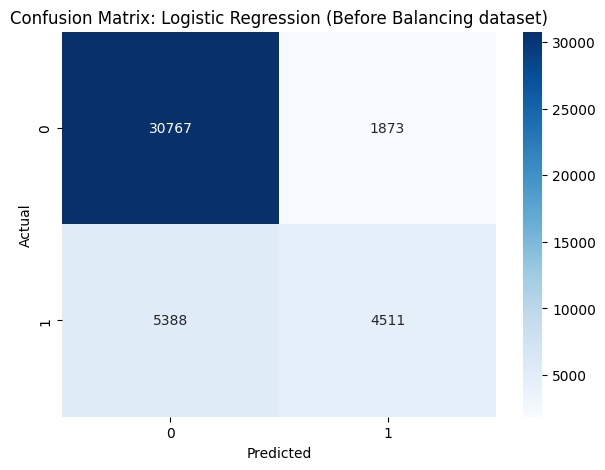

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1]) # type: ignore
plt.title('Confusion Matrix: Logistic Regression (Before Balancing dataset)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
# Compute per-class metrics
precision, recall, f1, support = precision_recall_fscore_support(Y_test, y_pred, labels=[0,1])


metrics_df = pd.DataFrame({
    'Class': ['Benign (0)', 'Malignant (1)'],
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Support': support
})
metrics_df

,Class,Precision,Recall,F1-score,Support
0,Benign (0),0.850975,0.942616,0.894455,32640
1,Malignant (1),0.706610,0.455703,0.554075,9899


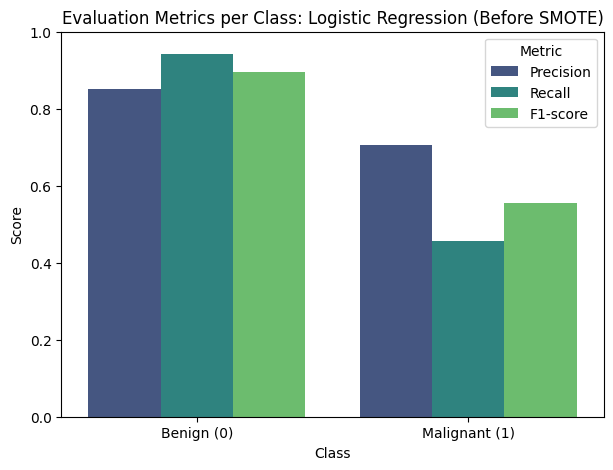

In [24]:
metrics_melted = metrics_df.melt(id_vars='Class', value_vars=['Precision','Recall','F1-score'],
                                 var_name='Metric', value_name='Score')

plt.figure(figsize=(7,5))
sns.barplot(x='Class', y='Score', hue='Metric', data=metrics_melted, palette='viridis')
plt.ylim(0,1)
plt.title('Evaluation Metrics per Class: Logistic Regression (Before SMOTE)')
plt.legend(title='Metric')
plt.show()

